In [65]:
import os
import numpy as np
import pickle as pkl
import stylised_facts.stylised_facts_data_utilities.createLOB as createLOB
import stylised_facts.stylised_facts_data_utilities.mdfda as myMFDFA
from collections import defaultdict
folder= '/media/ak/My Passport/Experiment Data/ActivityClockData/'
folderList = os.listdir(folder)
from MFDFA import MFDFA

# symbols =['FB1','JB1','FV1','G_1']
# folderList = os.listdir(folder)
def selectFiles(folderList, symbolIDX):
    return list(np.sort([s for s in folderList if ('Clocks') in s and ('_'+str(symbols[symbolIDX])) in s]))
import matplotlib.pyplot as plt
%matplotlib inline
# if __name__ == '__main__':
#     mergedDFs = defaultdict(dict)
#     clocks= selectFiles(folderList=folderList, symbolIDX=0)
#     column = 'MicroPrice'
#     for clocksIdx, _ in enumerate(clocks):
#         dateIdx = clocks[1].split("_")[-2]
#         fileLoc = "".join((folder, clocks[clocksIdx]))
#         dFclockdf = pkl.load(open(fileLoc, "rb"))
#         ref = dFclockdf[list(dFclockdf.keys())[0]]
#         sub = dFclockdf[list(dFclockdf.keys())[1]]
#         # #     sub2 = dFclockdf['VolumeBarDf']
#         # #     sub3 = dFclockdf['DollarVolumeBarDf']
#         ohlcDF1 = createLOB.get_ohlc(ref, sub)
#         # #     sub3 = dFclockdf['DollarVolumeBarDf']
#         # ohlcDF1 = createLOB.get_ohlc(ref, sub)
#         # #     ohlcDF2 =createLOB.get_ohlc(ref, sub2)
#         # #     ohlcDF3 =createLOB.get_ohlc(ref, sub3)
#         mergedDFs['Tick'][clocksIdx] = ohlcDF1
#     #     mergedDFs['Volume'][clocksIdx] = ohlcDF2

In [46]:
def selectFiles(folderList, symbolIDX):
    return list(np.sort([s for s in folderList if ('Clocks') in s and ('_'+str(symbols[symbolIDX])) in s]))

In [9]:

folder= '/media/ak/My Passport/Experiment Data/ActivityClockData/'
targetFolder = "".join((folder,'MergedDF/'))
folderList = os.listdir(folder)

'VolumeBarDf'

In [49]:
clocks = selectFiles(folderList, 1)
clocksIdx=0
fileLoc = "".join((folder, clocks[clocksIdx]))
dFclockdf = pkl.load(open(fileLoc, "rb"))

In [51]:
keys = list(dFclockdf.keys())



In [28]:
refTest=dFclockdf[list(dFclockdf.keys())[0]]

In [29]:
sub1Test=dFclockdf[list(dFclockdf.keys())[1]]

In [31]:
def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars

    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0] - 1)):
        start, end = sub.index[i], sub.index[i + 1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o, h, l, c = sub.iloc[i], max_px, min_px, sub.iloc[i + 1]
        ohlc.append((end, start, o, h, l, c))
    cols = ['End', 'Start', 'Open', 'High', 'Low', 'Close']
    return (pd.DataFrame(ohlc, columns=cols))

In [16]:
folder= '/media/ak/My Passport/Experiment Data/ActivityClockData/'
folderList = os.listdir(folder)
folderList
clocksDataList =[s for s in folderList if ('ClocksData') in s]
# correlDataList =[s for s in folderList if ('AtoCor') in s]

In [18]:
idxFile = 20
fileLoc = "".join((folder, clocksDataList[idxFile]))
symbolID =fileLoc.split("_")[1:3]
symbolText=("".join((symbolID[0]," ", symbolID[1])))
print('looking at symbol :', symbolText)

looking at symbol : G 1


In [19]:
pickle_to_file = pkl.load(open(fileLoc, "rb"))

In [20]:
keysDF =list(pickle_to_file.keys())
keysDF

['OriginalDF', 'TickBarDf', 'VolumeBarDf', 'DollarVolumeBarDf']

In [21]:
originalDF= pickle_to_file[keysDF[1]]
tickBarDF= pickle_to_file[keysDF[2]]

In [24]:
originalDF.columns.values

array(['BidQuoteId', 'BidSize', 'QuoteTime', 'type_x', 'BestBid',
       'TradeTime', 'AskQuoteId', 'AskSize', 'time_y', 'type_y',
       'BestAsk', 'TradeId', 'TradeVolume', 'TradedTime', 'type',
       'TradePrice', 'TradeId', 'TimeStamp', 'milliSeconds',
       'DollarVolume', 'MicroPrice', 'TradeSize', 'DollarVolumeTraded'],
      dtype=object)

In [35]:
originalDF = originalDF.groupby('TradeTime').sum()
tickBarDF = tickBarDF.groupby('TradeTime').sum()
originalDF.columns.values

array(['BidSize', 'BestBid', 'AskSize', 'BestAsk', 'TradeId',
       'TradeVolume', 'TradePrice', 'TradeId', 'milliSeconds',
       'DollarVolume', 'MicroPrice', 'TradeSize', 'DollarVolumeTraded'],
      dtype=object)

In [34]:
originalDF = originalDF.drop(columns=['AskQuoteId','BidQuoteId'])

In [37]:
tickBarDF =tickBarDF.drop(columns=['AskQuoteId','BidQuoteId'])

In [39]:
tickBarDF['MicroPricePctChange'] =tickBarDF.MicroPrice.pct_change()

In [72]:
originalDF['MicroPricePctChange'] =originalDF.MicroPrice.pct_change()

In [43]:
t_final = np.array(np.max(tickBarDF.shape[0]))
delta_t=1
# The time array of the trajectory
time = np.arange(0, t_final, delta_t)

In [82]:
y_tick = np.asarray(tickBarDF.MicroPricePctChange.dropna())
y_orig = np.asarray(originalDF.MicroPricePctChange.dropna())

In [76]:
symbolText

'G 1'

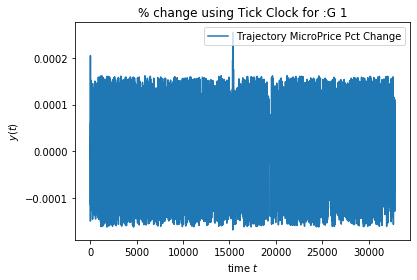

In [84]:
#This is the stochastic trajectory over time
_=plt.plot( y_tick, label = r'Trajectory MicroPrice Pct Change')
plt.title('% change using Tick Clock for :' + str(symbolText))
plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')

_=plt.legend()
title = 'MicroPrice Pct Change Tick'+ str(symbolText)
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + title + '.png', dpi=150)

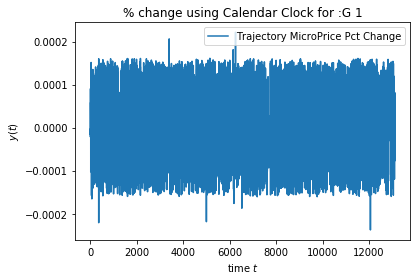

In [85]:
#This is the stochastic trajectory over time
_=plt.plot( y_orig, label = r'Trajectory MicroPrice Pct Change')
plt.title('% change using Calendar Clock for :' + str(symbolText))
plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')

_=plt.legend()
title = 'MicroPrice Pct Change Calendar'+ str(symbolText)
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + title + '.png', dpi=150)

In [86]:
# Select a band of lags, which usually ranges from 
# very small segments of data, to very long ones, as
lag = np.logspace(0.7, 4, 60).astype(int)
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 9

# The order of the polynomial fitting
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y_tick, lag = lag, q = q, order = order)

In [88]:

# Obtain the (MF)DFA as
lagOrig, dfaOrig = MFDFA(y_orig, lag = lag, q = q, order = order)

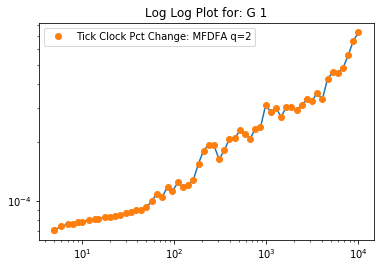

<Figure size 432x288 with 0 Axes>

In [98]:
_=plt.plot(lag, dfa)
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='Tick Clock Pct Change: MFDFA q=2')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate 
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]

plt.title('Log Log Plot for: '+ str(symbolText))
titleLogLog = 'LogLogPlot: '+str(symbolText)
# Now what you should obtain is: slope = H + 1
plt.legend()
plt.show()
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + titleLogLog + '.png', dpi=150)

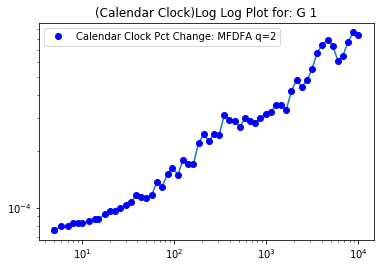

<Figure size 432x288 with 0 Axes>

In [99]:
_=plt.plot(lagOrig, dfaOrig)
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lagOrig, dfaOrig, 'o', label='Calendar Clock Pct Change: MFDFA q=2', color='b')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate 
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
np.polyfit(np.log(lag[:15]), np.log(dfaOrig[:15]),1)[0]

plt.title('(Calendar Clock)Log Log Plot for: '+ str(symbolText))
titleLogLog = 'Original_Clock_LogLogPlot: '+str(symbolText)
# Now what you should obtain is: slope = H + 1
plt.legend()
plt.show()
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + titleLogLog + '.png', dpi=150)

In [122]:
RW1=np.cumsum(y_tick-np.mean(y_tick));

RW2=np.cumsum(y_orig-np.mean(y_orig));


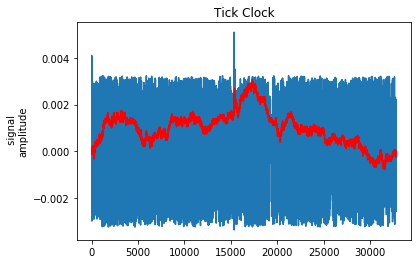

In [158]:
A = 20.0

plt.plot(A*y_tick)
plt.plot(RW1,'r',lw=1.5)
plt.title('Tick Clock')
title ='rw1tickclock'
_=plt.ylabel(' signal\namplitude',ha='center')
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + str(title) + '.png', dpi=150)

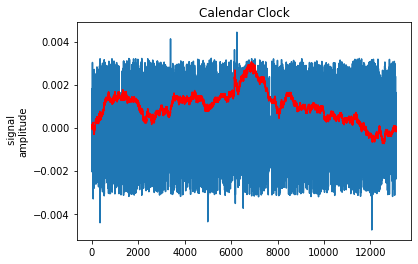

In [157]:
A = 20.0

plt.plot(A*y_orig)
plt.plot(RW2,'r',lw=1.5)
plt.title('Calendar Clock')
title ='rw2tickclock'
_=plt.ylabel(' signal\namplitude',ha='center')
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + title + '.png', dpi=150)

In [125]:
def plot_rms(x,label=''):
    RMS = np.sqrt((x**2).sum())
    plt.plot(x)
    x0 = x.mean()
    x1 = x.std()
    plt.plot(plt.xlim(),x0*np.r_[1,1],'r--')
    plt.plot(plt.xlim(),(x0+x1)*np.r_[1,1],'r-',lw=1.25)
    plt.plot(plt.xlim(),(x0-x1)*np.r_[1,1],'r-',lw=1.25)
    plt.ylabel(label,ha='center')

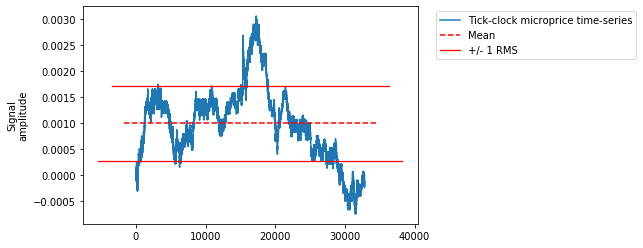

In [126]:
plot_rms(RW1,'Signal\namplitude')
plt.legend(['Tick-clock microprice time-series','Mean','+/- 1 RMS'], bbox_to_anchor=(1.04,1), loc="upper left")
titleRMS ='RMSTick'
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + titleRMS + '.png', dpi=150)

# plot_rms(monofractal,'Monofractal signal\namplitude')
# subplot(313)
# plot_rms(whitenoise,'White noise\namplitude')
# if SAVE: savefig('figure2.png')

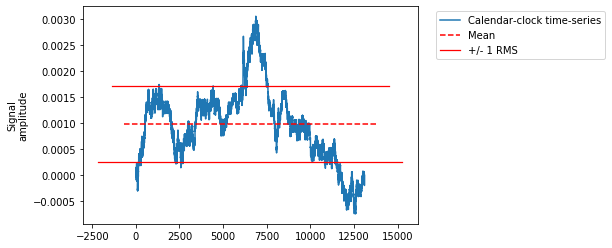

In [127]:
plot_rms(RW2,'Signal\namplitude')
plt.legend(['Calendar-clock time-series','Mean','+/- 1 RMS'], bbox_to_anchor=(1.04,1), loc="upper left")
titleRMS ='RMSCalendar'
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + titleRMS + '.png', dpi=150)

# subplot(312)
# plot_rms(monofractal,'Monofractal signal\namplitude')
# subplot(313)
# plot_rms(whitenoise,'White noise\namplitude')
# if SAVE: savefig('figure2.png')

# Plot Trends ##

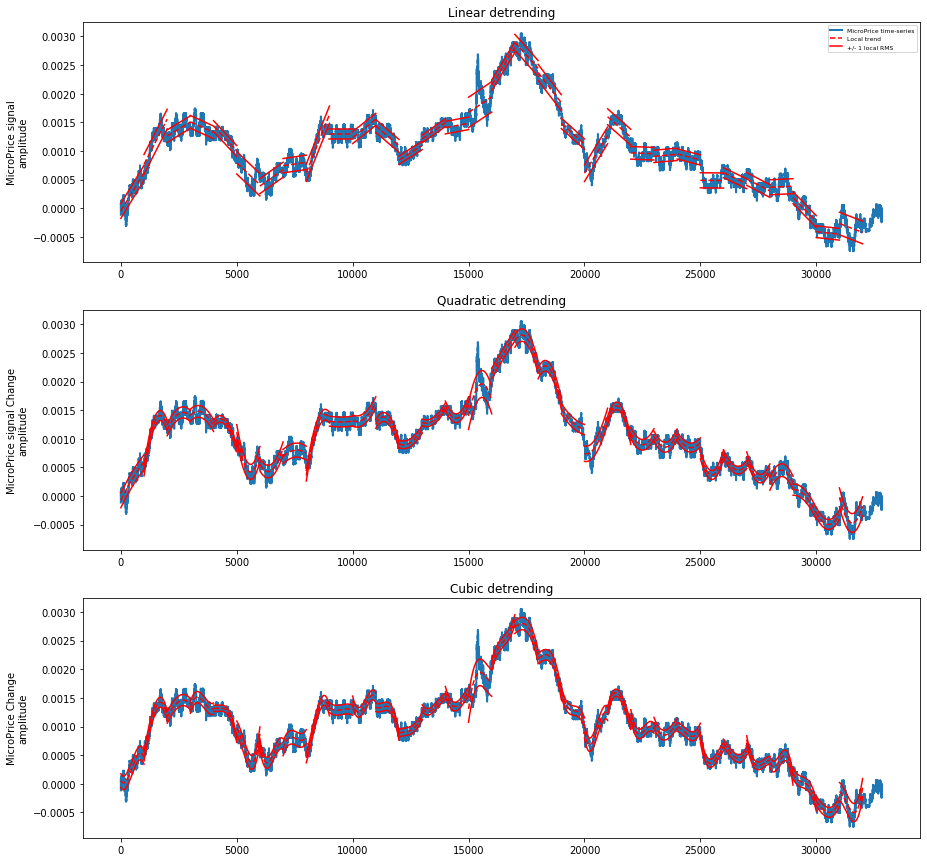

In [159]:
from numpy import cumsum, polyfit, polyval
def plot_trends(X,scale,m=1,label='',title=''):
    t = np.arange(X.shape[0])
    plt.plot(t,X,lw=2.0)
    for i0 in range(0,X.shape[0]-scale+1,scale):
        i1 = i0+scale
        t0 = t[i0:i1]
        C = polyfit(t0,X[i0:i1],m)
        fit = polyval(C,t0);
        RMS = np.sqrt(((X[i0:i1]-fit)**2).mean())
        plt.plot(t0,fit,color='r',linestyle='--')
        plt.plot(t0,fit-RMS,'r')
        plt.plot(t0,fit+RMS,'r')
    plt.ylabel(label,ha='center')
#     if title: plt.text(100,500,title,fontsize=12) 

scale = 1000
RW = cumsum(y_orig-y_orig.mean())
f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(311)
plt.title('Linear detrending')
plot_trends(RW1,scale,1,label='MicroPrice signal\namplitude',
            title='A Linear detrending')
plt.legend(['MicroPrice time-series','Local trend','+/- 1 local RMS'], prop={'size': 6}, loc='upper right')
plt.subplot(312)
plt.title('Quadratic detrending')
plot_trends(RW1,scale,2,label='MicroPrice signal Change\namplitude',
            title='B Quadratic detrending')
plt.subplot(313)
plt.title('Cubic detrending')
plot_trends(RW1,scale,3,label='MicroPrice Change\namplitude',
            title='C Cubic detrending')
title='rms_trends'
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + str(title) + '.png', dpi=150)

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'Amplitude')

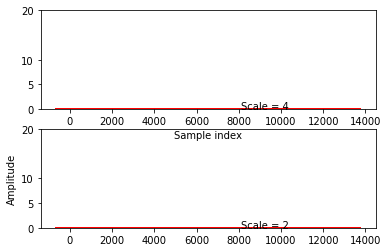

In [162]:
from numpy import arange, polyfit, polyval, sqrt, array, r_
from matplotlib.pyplot import step, xlim
def trends(X,scale,m=1):
    t = arange(X.shape[0])
    segments = arange(0,X.shape[0]-scale+1,scale)
    RMS = []
    for i0 in segments:
        i1 = i0+scale
        t0 = t[i0:i1]
        C = polyfit(t0,X[i0:i1],m)
        fit = polyval(C,t0)
        RMS.append( sqrt(((X[i0:i1]-fit)**2).mean()) )
    return array(RMS)

RW = cumsum(y_orig-y_orig.mean())
RMS = {}
for si, scale in enumerate(scales):
    plt.subplot(len(scales),1,len(scales)-si)
    t = arange(0,RW.shape[0]+1,scale)
    RMS[scale] = trends(RW,scale,m)
    step(t,r_[RMS[scale],RMS[scale][-1]],where='post')
    plt.plot(xlim(),r_[1,1]*RMS[scale].mean(),'r',lw=2.0)
    plt.text(8100,RMS[scale].mean(),'Scale = %d'%scale)
    if scale < 128:
        plt.yticks([0,5,10,20])
    else:
        plt.yticks([0,10,20,40])

plt.xlabel('Sample index')
plt.subplot(len(scales),1,len(scales)//2+1)
plt.ylabel('Amplitude')

In [185]:
from numpy import floor, zeros
def trends(X,scale,m=1):
    X = X[:X.shape[0]-X.shape[0]%scale].reshape(-1,scale)
    i = arange(scale,dtype='f8')
    RMS = zeros(X.shape[0],'f8')
    for j in range(X.shape[0]):
        C = polyfit(i,X[j],m)
        fit = polyval(C,i)
        RMS[j] = sqrt(((X[j]-fit)**2).mean())
    return RMS

def comp_Fs(X,scales,m=1):
    RW = cumsum(X-X.mean())
    return array([ sqrt((trends(RW,scale,m)**2).mean()) for scale in scales ])
    
scales = floor(2.0**arange(4,11,0.25)).astype('i4')
F_mf = comp_Fs(y_tick,scales,1)
F_1f = comp_Fs(y_orig,scales,1)
# F_wn = comp_Fs(whitenoise,scales,1)
print(F_mf.max()) 
print(F_1f.max())

0.00015071053900977204
0.0002499226065049789


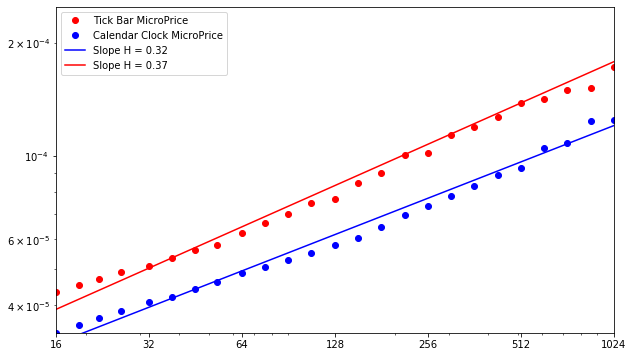

In [202]:
plt.figure(figsize=(10,6))
plt.loglog(scales,F_1f,'ro',label='Tick Bar MicroPrice')
#plt.loglog(scales,F_wn,'go',label='White noise')
plt.loglog(scales,F_mf,'bo',label='Calendar Clock MicroPrice')
plt.axis([16,1024,3.383295283925027e-05,0.0002499226065049789])
plt.xticks(2**arange(4,11),2**arange(4,11))
#plt.yticks(2**arange(0,6),2**arange(0,6))

def plot_logfit(x,y,lc):
    C = polyfit(np.log2(x),np.log2(y),m)
    plt.plot(x,2**polyval(C,np.log2(x)),lc,label='Slope H = %0.2f'%C[0])

plot_logfit(scales,F_mf,'b')
plot_logfit(scales,F_1f,'r')
#plt.plot_logfit(scales,F_wn,'c')
plt.legend(loc='upper left')

In [160]:
from matplotlib import patches

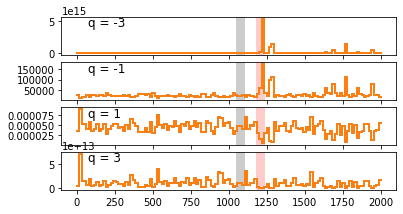

In [204]:
# plt.subplot(611)
i1 = 2000
plt.plot(y_orig[:i1])
plt.plot(y_tick[:i1]-5)
yl = plt.ylim()
plt.gca().add_patch( patches.Rectangle((1050,yl[0]),55,yl[1]-yl[0],alpha=0.2,fc='k') )
plt.gca().add_patch( patches.Rectangle((1180,yl[0]),55,yl[1]-yl[0],alpha=0.2,fc='r') )
plt.text(75,0.75*yl[1],'Fractal time-series',fontsize=12)
    
RWm = RW1[:i1]
RW1 = RW2[:i1]

j = 2
for q in [-3,-1,1,3]:
    plt.subplot(5,1,j); j += 1
    rms = trends(RWm,16,1)
    step(arange(rms.shape[0]+1)*16,r_[rms,rms[-1]]**q,where='post',lw=2.0)
    rms = trends(RW1,16,1)
    step(arange(rms.shape[0]+1)*16,r_[rms,rms[-1]]**q,where='post',lw=2.0)
    yl = plt.ylim()
    plt.gca().add_patch( patches.Rectangle((1050,yl[0]),55,yl[1]-yl[0],alpha=0.2,fc='k') )
    plt.gca().add_patch( patches.Rectangle((1180,yl[0]),55,yl[1]-yl[0],alpha=0.2,fc='r') )
    plt.text(75,0.75*yl[1],'q = %d'%q,fontsize=12)

# if SAVE: savefig('figure7.png')